### HOUSE PRICING PREDICTION ANALYSIS

#### USED PACKAGES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

#### VISUALIZATION STYLE

In [2]:
pd.set_option("display.float_format", lambda x: "%.5f" %x)

In [3]:
plt.style.use(["default"])
params = {"axes.labelsize": 12,
         "axes.titlesize": 14,
         "font.size": 12,
         "legend.fontsize": 12,
         "xtick.labelsize": 10,
         "ytick.labelsize": 10,
         "figure.facecolor": "white",
         "font.family": "serif"}
plt.rcParams.update(params)

#### IMPORT AND COPY DATASET

In [4]:
housing_dataset = pd.read_csv("housing_price.csv")


In [5]:
housing_data = housing_dataset.copy()

In [6]:
housing_data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.00000,3.00000,1.50000,1340,7912,1.50000,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.00000,5.00000,2.50000,3650,9050,2.00000,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.00000,3.00000,2.00000,1930,11947,1.00000,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.00000,3.00000,2.25000,2000,8030,1.00000,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.00000,4.00000,2.50000,1940,10500,1.00000,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308166.66667,3.00000,1.75000,1510,6360,1.00000,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.33333,3.00000,2.50000,1460,7573,2.00000,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.16667,3.00000,2.50000,3010,7014,2.00000,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.00000,4.00000,2.00000,2090,6630,1.00000,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


#### ORGANIZING DATA

##### Calculating and creating new column: "Age"

In [7]:
age = dt.datetime.now().year - housing_data["yr_built"]
age

0        67
1       101
2        56
3        59
4        46
       ... 
4595     68
4596     39
4597     13
4598     48
4599     32
Name: yr_built, Length: 4600, dtype: int64

In [8]:
housing_data["Age"] = age

##### Changing data type: Bedrroms, Bathrooms, Floors

In [9]:
housing_data["bedrooms"]=housing_data["bedrooms"].values.astype('object')

In [10]:
housing_data["floors"]=housing_data["floors"].values.astype('object')

In [11]:
housing_data["bathrooms"]=housing_data["bathrooms"].values.astype('object')

##### Replace values: Condition, View

In [12]:
housing_data.loc[:,'condition'].replace([1,2,3,4,5],
                                      ['Poor','Fair','Normal', 'Good', 'Excellent'],
                                      inplace=True)


In [13]:
housing_data.loc[:,'view'].replace([0,1,2,3,4],
                                      ['Poor','Fair','Normal', 'Good', 'Excellent'],
                                      inplace=True)

#### OVERVIEW

###### Dataset on house price was gathered in 4600 rows and 18 columns

In [14]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   object 
 3   bathrooms      4600 non-null   object 
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   object 
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   object 
 9   condition      4600 non-null   object 
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
 18  Age     

In [15]:
housing_data.shape

(4600, 19)

###### - Average price in given area is 551,962 dollar with maximum of 26,590,000 dollar and minimum of 0 dollar. Main reason behind high amount of average price is outlier.

In [16]:
np.round(housing_data[["price","sqft_living", "sqft_lot"]].describe(), decimals = 2)
#housing_data[["price","sqft_living", "sqft_lot", "Age"]].describe()

,price,sqft_living,sqft_lot
count,4600.00000,4600.00000,4600.00000
mean,551962.99000,2139.35000,14852.52000
std,563834.70000,963.21000,35884.44000
min,0.00000,370.00000,638.00000
25%,322875.00000,1460.00000,5000.75000
50%,460943.46000,1980.00000,7683.00000
75%,654962.50000,2620.00000,11001.25000
max,26590000.00000,13540.00000,1074218.00000


<AxesSubplot:xlabel='price'>

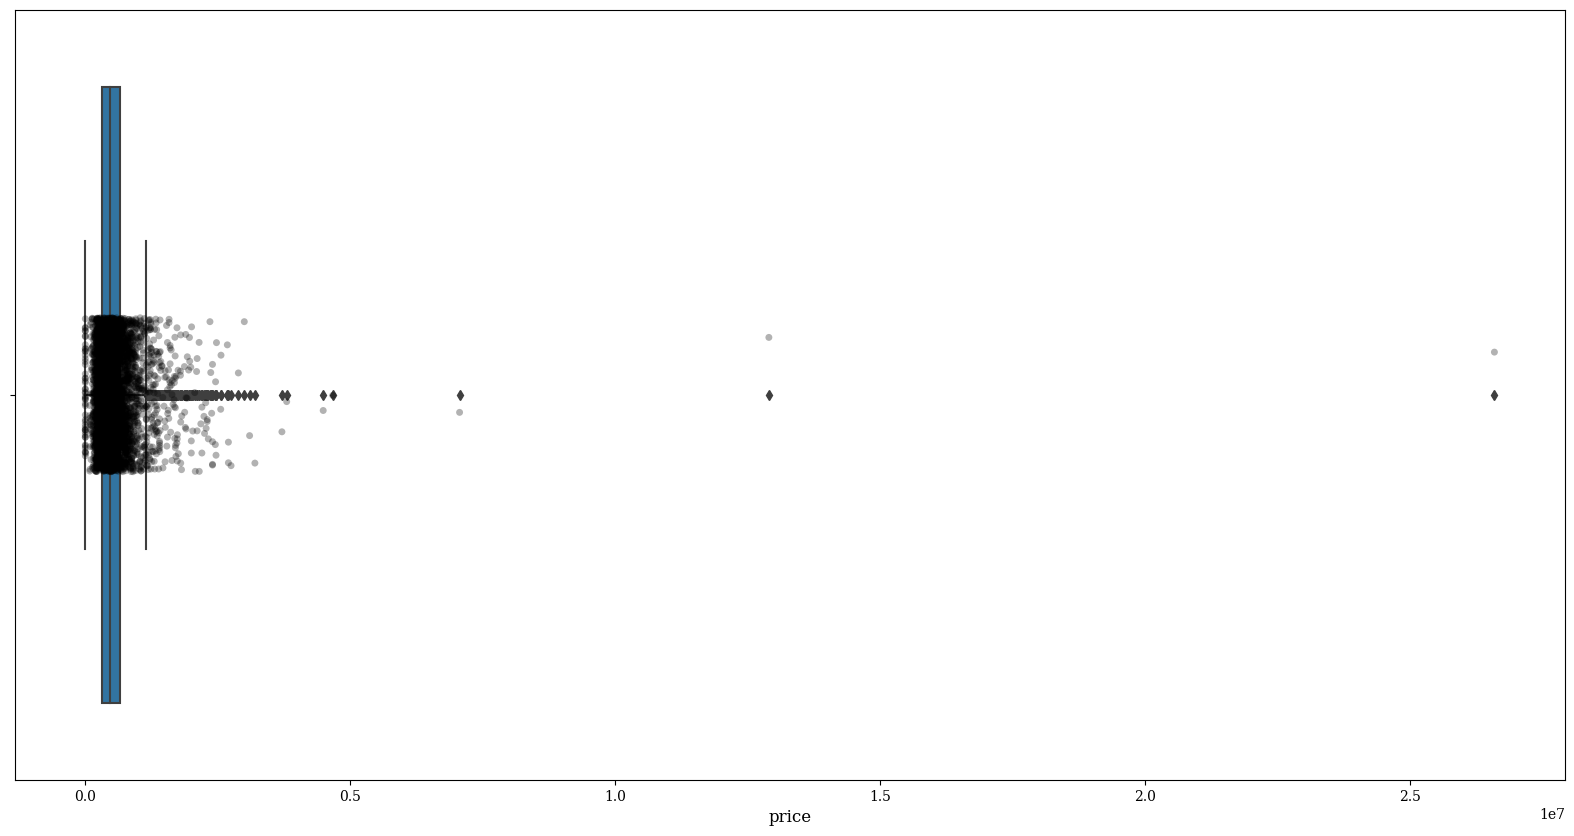

In [17]:
boxplot_w_outliers = plt.figure(figsize=(20, 10))
sns.boxplot(x='price', data=housing_data, showmeans=True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
sns.stripplot(x = "price",
              color = 'black',
              alpha=0.3,
              data=housing_data)

In [20]:
boxplot_w_outliers.figure.savefig("outliers boxplot.png")

In [18]:
def outliers(Q1, Q3, median_value):
    maximum_value = median_value + 1.5*(Q3-Q1)
    minimum_value = median_value - 1.5*(Q3-Q1)
    return maximum_value, minimum_value

In [19]:
outliers(322875, 654962.5, 460943.46)

(959074.71, -37187.78999999998)

In [20]:
clean_home_data = housing_data[housing_data.price < 959074.71].copy()
np.round(clean_home_data[["price","sqft_living", "sqft_lot"]].describe(), decimals = 2)


,price,sqft_living,sqft_lot
count,4213.00000,4213.00000,4213.00000
mean,462372.17000,1994.14000,14305.37000
std,196982.21000,778.63000,35749.14000
min,0.00000,370.00000,638.00000
25%,310000.00000,1420.00000,5000.00000
50%,439333.33000,1890.00000,7528.00000
75%,592500.00000,2460.00000,10500.00000
max,957000.00000,8020.00000,1074218.00000


In [21]:
clean_home_data

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,Age
0,2014-05-02 00:00:00,313000.00000,3.00000,1.50000,1340,7912,1.50000,0,Poor,Normal,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,67
2,2014-05-02 00:00:00,342000.00000,3.00000,2.00000,1930,11947,1.00000,0,Poor,Good,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,56
3,2014-05-02 00:00:00,420000.00000,3.00000,2.25000,2000,8030,1.00000,0,Poor,Good,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,59
4,2014-05-02 00:00:00,550000.00000,4.00000,2.50000,1940,10500,1.00000,0,Poor,Good,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,46
5,2014-05-02 00:00:00,490000.00000,2.00000,1.00000,880,6380,1.00000,0,Poor,Normal,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA,84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,308166.66667,3.00000,1.75000,1510,6360,1.00000,0,Poor,Good,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA,68
4596,2014-07-09 00:00:00,534333.33333,3.00000,2.50000,1460,7573,2.00000,0,Poor,Normal,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA,39
4597,2014-07-09 00:00:00,416904.16667,3.00000,2.50000,3010,7014,2.00000,0,Poor,Normal,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA,13
4598,2014-07-10 00:00:00,203400.00000,4.00000,2.00000,2090,6630,1.00000,0,Poor,Normal,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA,48


<AxesSubplot:xlabel='price'>

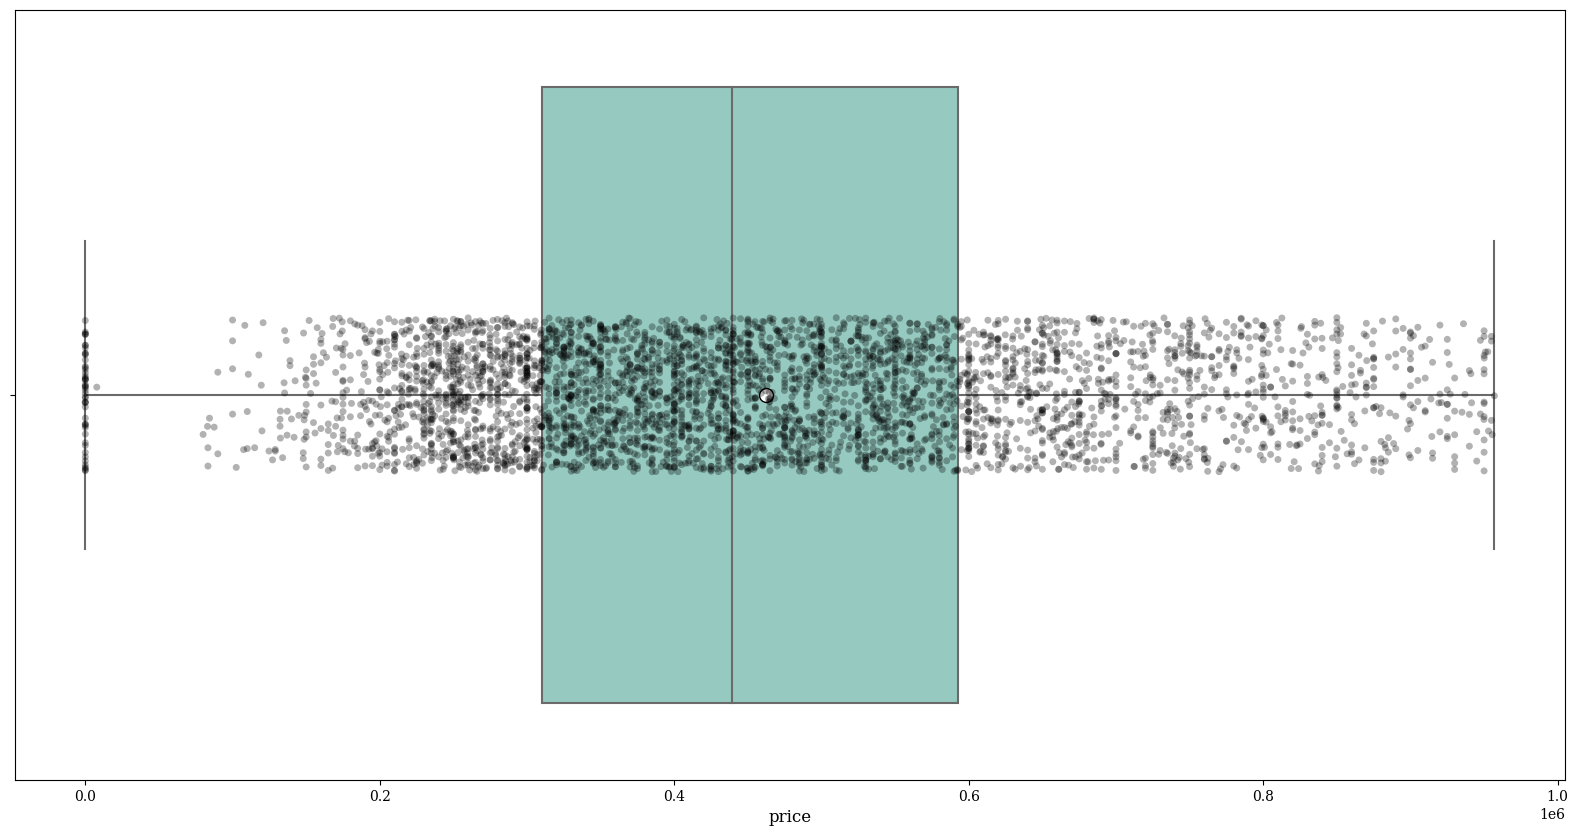

In [22]:
plt.figure(figsize=(20, 10))
sns.boxplot(x='price', 
            data = clean_home_data, 
            palette="Set3", 
            showmeans = True, 
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})

sns.stripplot(x = "price",
              color = 'black',
              alpha=0.3,
              data=clean_home_data)

In [23]:
clean_home_data.shape

(4213, 19)

#### CATEGORICAL VARIABLLES

##### HEATMAP

<Figure size 1200x600 with 0 Axes>

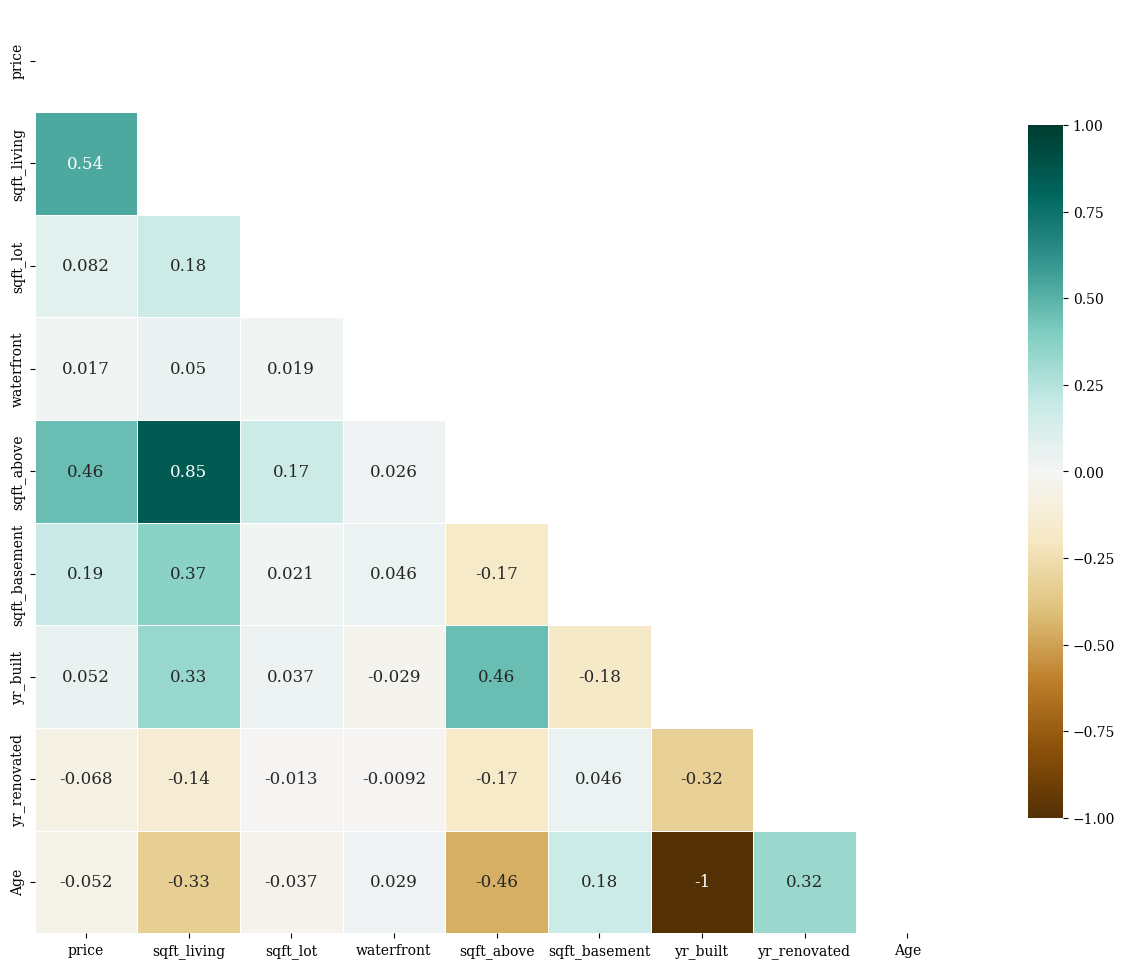

In [25]:
plt.figure(figsize=(12, 6))
corr = clean_home_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(18, 12))

# Generate a custom diverging colormap
# cmap = sns.diverging_palette(700, 500, as_cmap=True)
cmap = 'BrBG'
# Draw the heatmap with the mask and correct aspect ratio
heat_map = sns.heatmap(corr, mask=mask, cmap=cmap, vmax= 1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .75}, annot = True)

In [32]:
heat_map.figure.savefig("correlation_map.png")

##### PRICE DISTRIBUTION

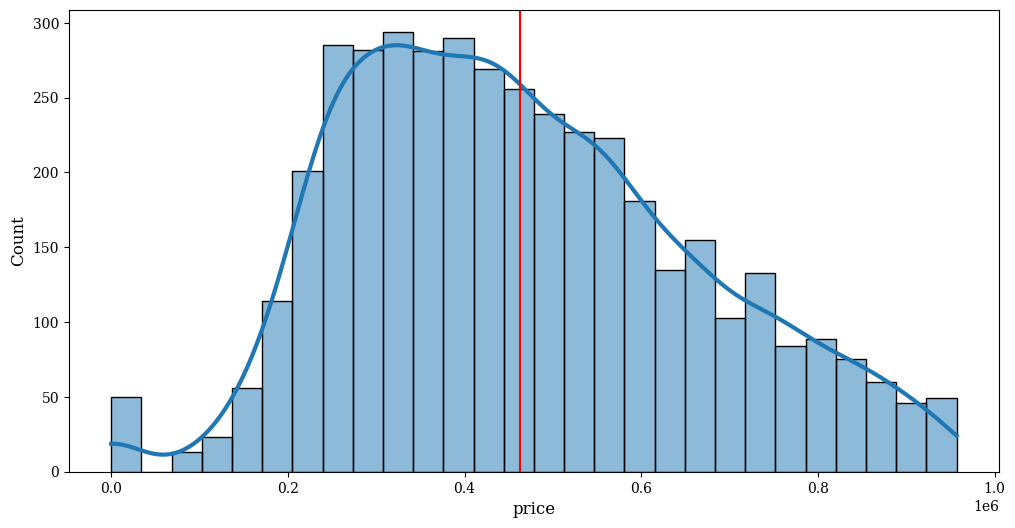

In [26]:
plt.figure(figsize=(12, 6))
price_dist = sns.histplot(x = "price",
             data = clean_home_data,
           kde=True,
             line_kws={"linewidth":3})
plt.axvline(x = clean_home_data.price.mean(),
            color='red')

In [35]:
price_dist.figure.savefig("price_distribution.png")

##### BY CONDITION

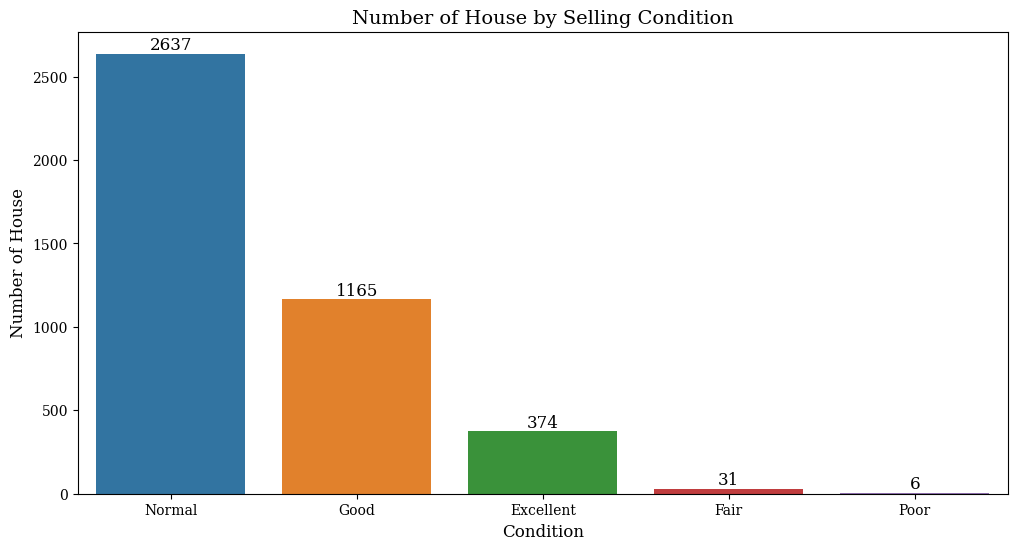

In [27]:
plt.figure(figsize=(12, 6))
condition_dist = sns.countplot(x = clean_home_data['condition'], 
                   data = clean_home_data, 
                   order = clean_home_data['condition'].value_counts().index)

condition_dist.bar_label(condition_dist.containers[0])
plt.title("Number of House by Selling Condition")
plt.xlabel("Condition")
plt.ylabel("Number of House")
plt.show()
# How to sort by number of apartments?


In [38]:
condition_dist.figure.savefig("Number of House by Selling Condition.png")

In [28]:
poor_condition = clean_home_data[clean_home_data.condition == "Poor"]
poor_condition

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,Age
402,2014-05-09 00:00:00,255000.00000,2.00000,1.00000,810,7980,1.00000,0,Poor,Poor,810,0,1928,0,12727 2nd Ave SW,Seattle,WA 98146,USA,94
1422,2014-05-28 00:00:00,550000.00000,4.00000,1.00000,1660,34848,1.00000,0,Poor,Poor,930,730,1933,0,6056 156th Ave NE,Redmond,WA 98052,USA,89
2337,2014-06-11 00:00:00,427000.00000,4.00000,1.00000,1860,4736,1.50000,0,Poor,Poor,1860,0,1901,0,2411-2499 E Roy St,Seattle,WA 98112,USA,121
3034,2014-06-23 00:00:00,365000.00000,4.00000,2.00000,1940,25600,1.00000,0,Poor,Poor,1940,0,1962,0,4125 158th Ave SE,Bellevue,WA 98006,USA,60
3678,2014-06-30 00:00:00,235000.00000,2.00000,1.00000,900,28800,1.00000,0,Poor,Poor,900,0,1928,0,8406 Railroad Ave,Snoqualmie,WA 98065,USA,94
4351,2014-05-06 00:00:00,7800.00000,2.00000,1.00000,780,16344,1.00000,0,Poor,Poor,780,0,1942,0,4229 S 144th St,Tukwila,WA 98168,USA,80


##### BY VIEW

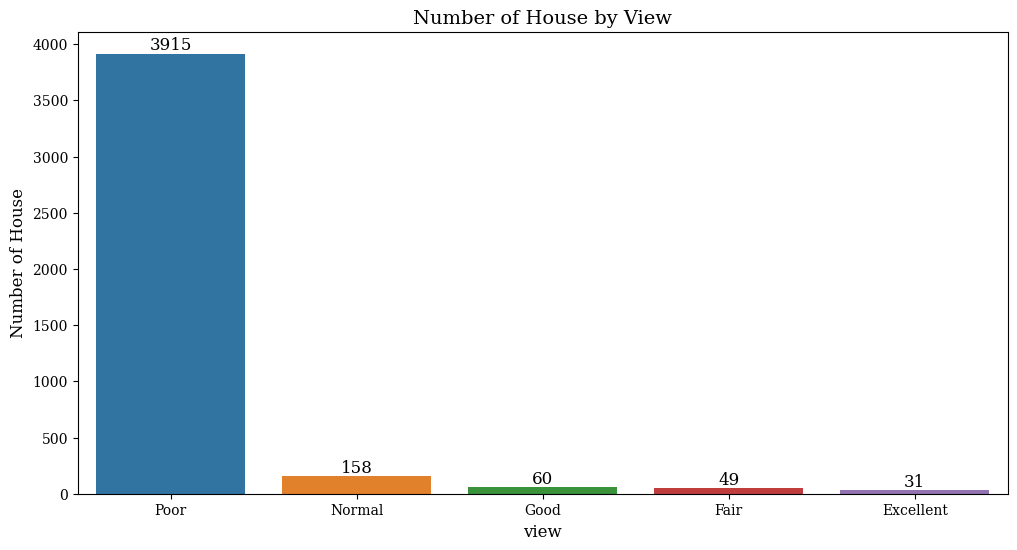

In [29]:
plt.figure(figsize=(12, 6))
view_dist = sns.countplot(x = clean_home_data['view'], 
                   data = clean_home_data, 
                   order = clean_home_data['view'].value_counts().index)

view_dist.bar_label(view_dist.containers[0])
plt.title("Number of House by View")
plt.xlabel("view")
plt.ylabel("Number of House")
plt.show()


In [40]:
view_dist.figure.savefig("Number of House by View.png")

##### BY AGE

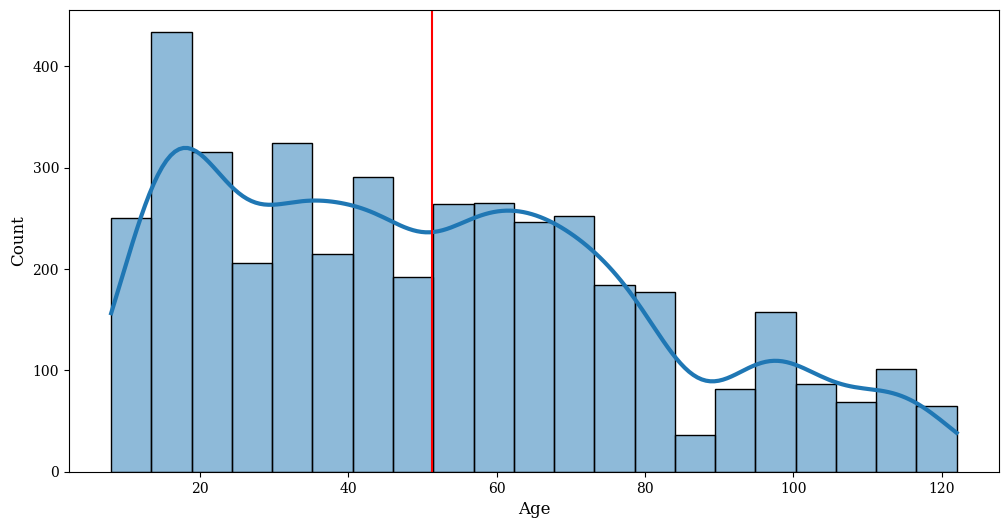

In [30]:
plt.figure(figsize=(12, 6))
age_dist = sns.histplot(x = "Age",
             data = clean_home_data,
           kde=True,
             line_kws={"linewidth":3})
plt.axvline(x = clean_home_data.Age.mean(),
            color='red')

In [42]:
age_dist.figure.savefig("age_distribution.png")

C:\Users\Arzu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Correlation between price and age')

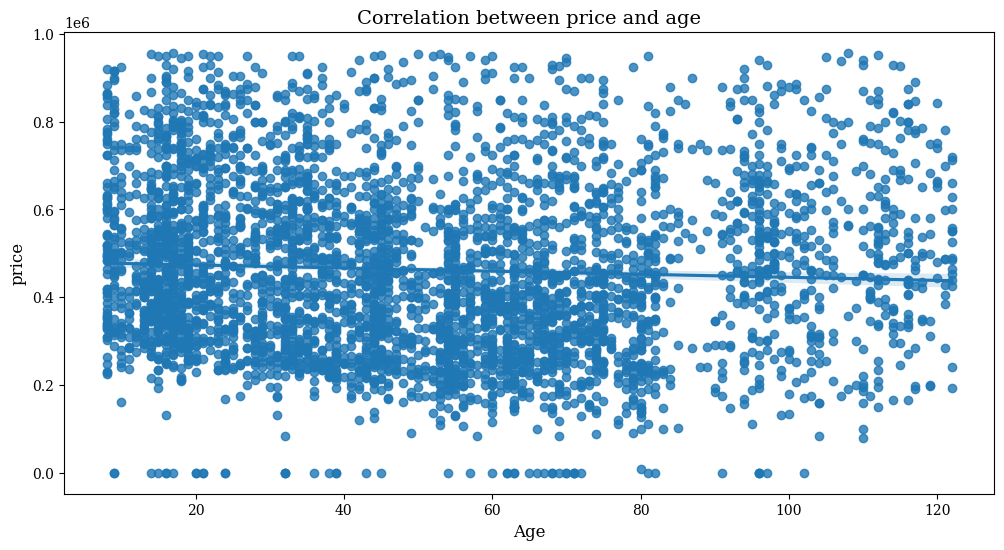

In [31]:
plt.figure(figsize=(12, 6))
age_reg_plot = sns.regplot(clean_home_data['Age'], clean_home_data['price'] )
plt.title("Correlation between price and age")

In [45]:
age_reg_plot.figure.savefig("correlation_between_price_and_age.png")

##### BY CITY

In [32]:
a = clean_home_data.groupby("city").price.mean().reset_index()
a

,city,price
0,Algona,207288.00000
1,Auburn,299340.44277
2,Beaux Arts Village,745000.00000
3,Bellevue,614256.36739
4,Black Diamond,339605.55556
5,Bothell,481441.89394
6,Burien,321177.41393
7,Carnation,452978.23810
8,Clyde Hill,468000.00000
9,Covington,250904.93197


Text(0.5, 1.0, 'Average price by city')

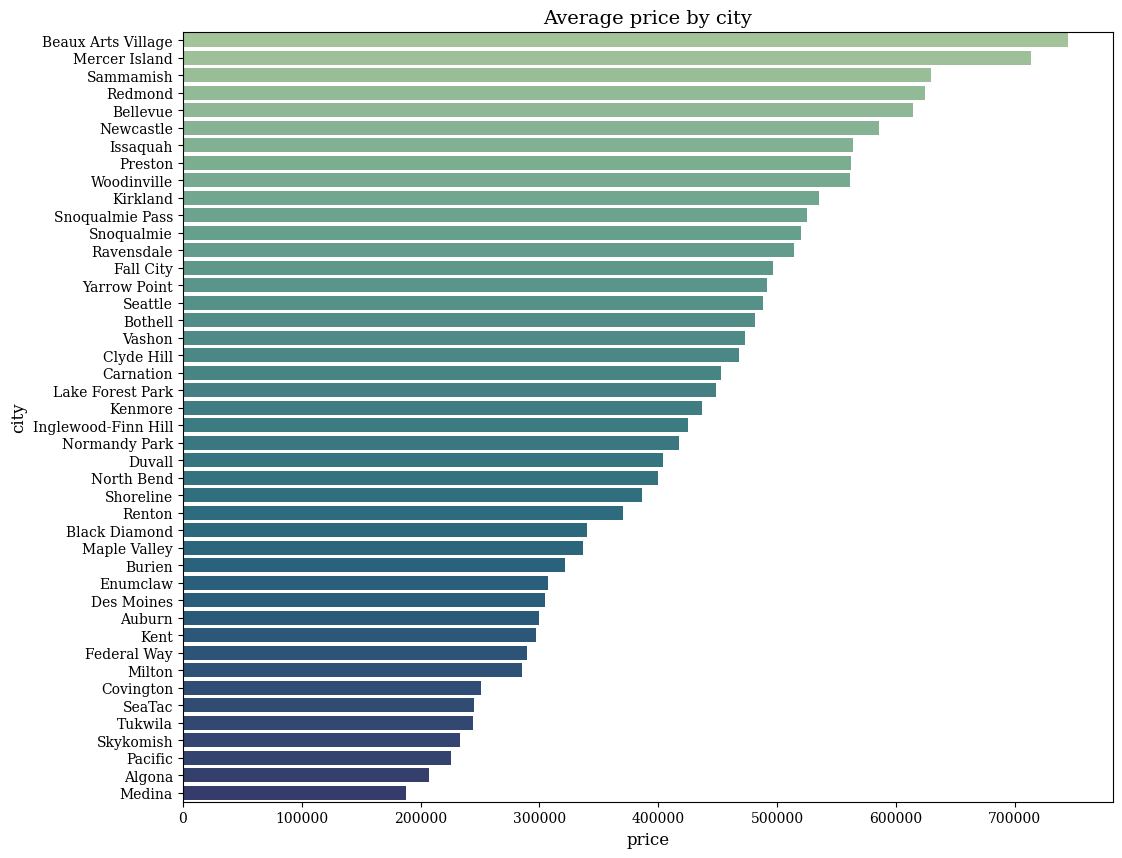

In [35]:
plt.figure(figsize=(12, 10))
#sns.color_palette("mako", as_cmap=True)
price_by_city = sns.barplot(x=a['price'],
            y=a['city'],
            data=a,
            ci=None,
           order=a.sort_values('price', ascending = False).city, 
                palette = "crest" )
plt.title("Average price by city")





In [51]:
price_by_city.figure.savefig("Average_price_by_city.png")

##### BY FLOOR

Text(0.5, 1.0, 'Number of house by floor')

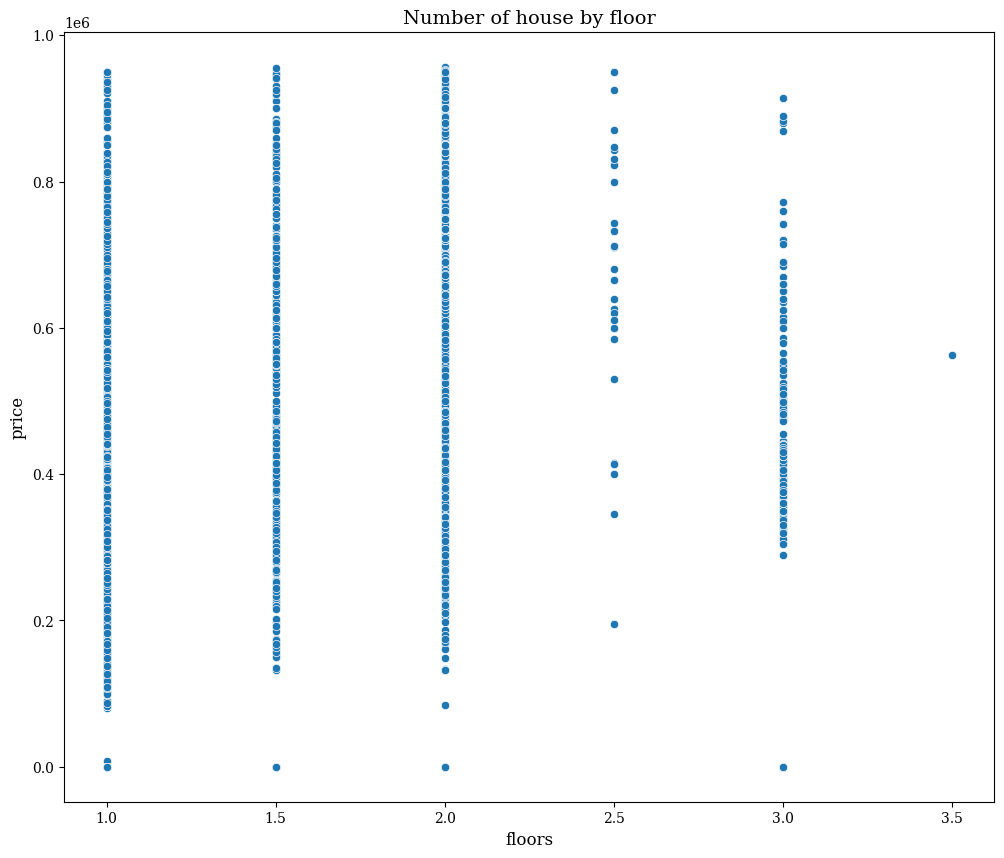

In [36]:
plt.figure(figsize=(12, 10))
house_by_floor = sns.scatterplot(x=clean_home_data['floors'], y=clean_home_data['price'])
plt.title("Number of house by floor")

In [55]:
house_by_floor.figure.savefig("house_by_floor")

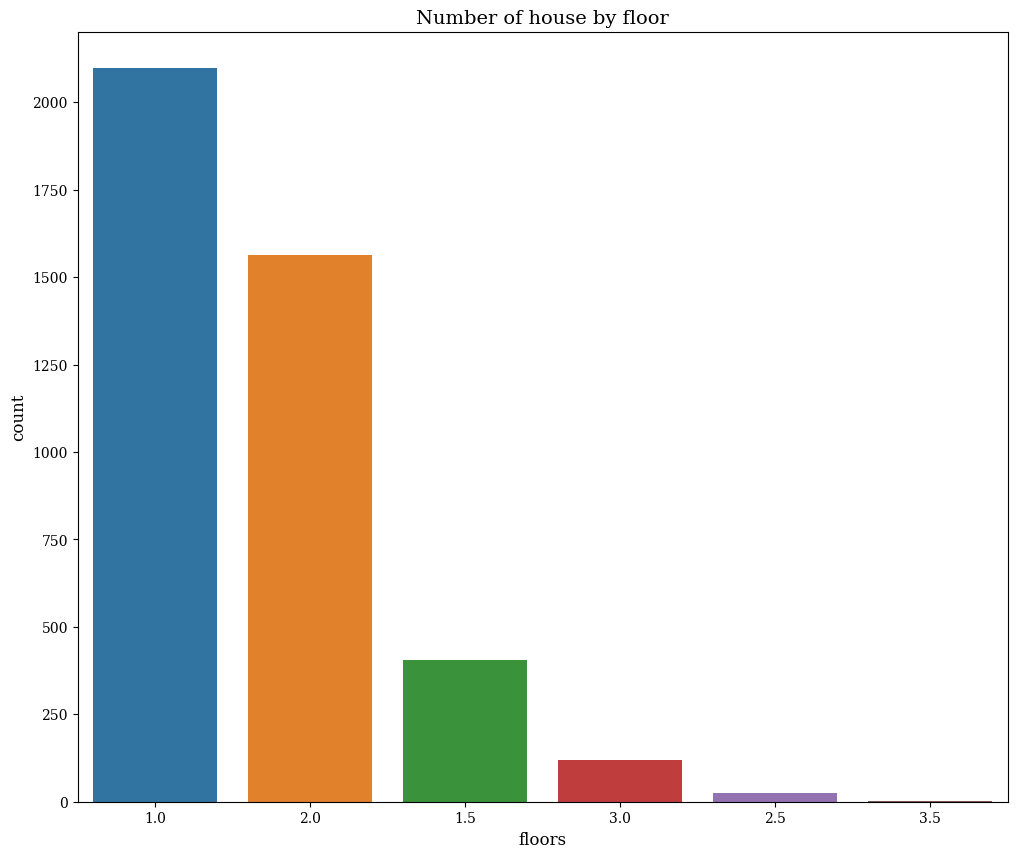

In [37]:
plt.figure(figsize=(12, 10))
house_by_floor = sns.countplot(x="floors", data = clean_home_data,
                  order = clean_home_data['floors'].value_counts().index)
plt.title("Number of house by floor")
plt.show()

In [75]:
house_by_floor.figure.savefig("house_by_floor")

##### BY BEDROOM

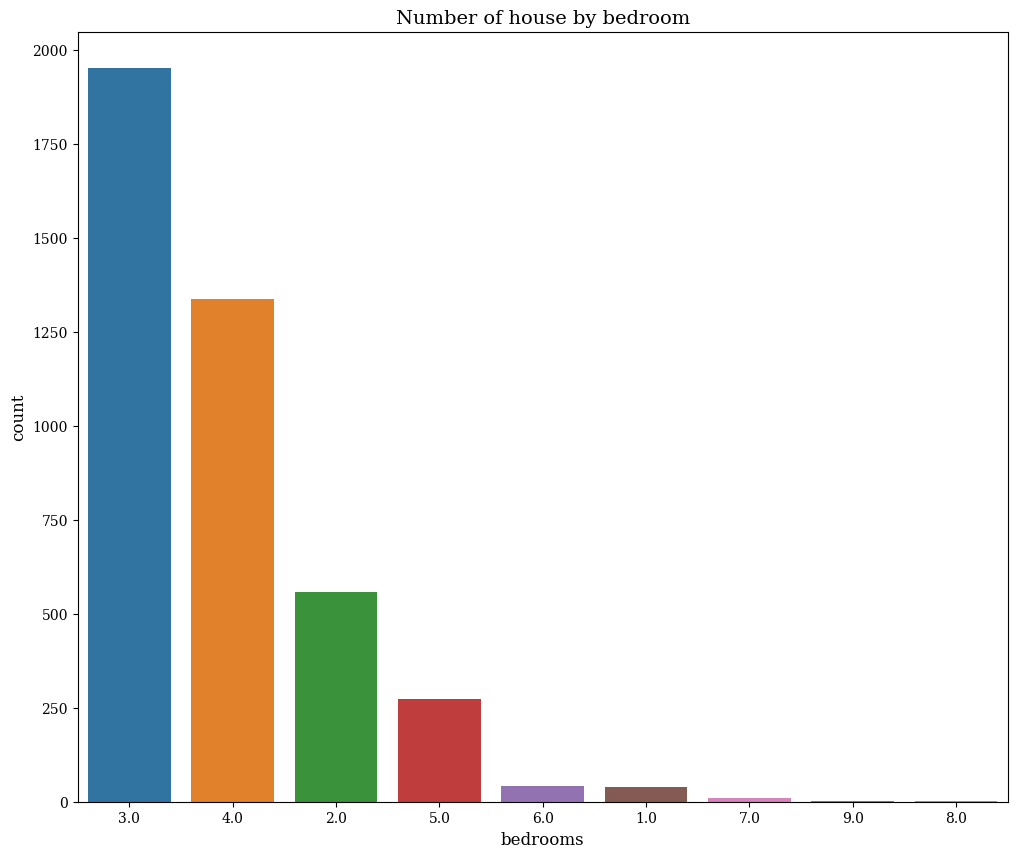

In [38]:
plt.figure(figsize=(12, 10))
house_by_bedroom = sns.countplot( x = clean_home_data["bedrooms"], order = clean_home_data['bedrooms'].value_counts().index)
plt.title("Number of house by bedroom")
plt.show()

In [78]:
house_by_bedroom.figure.savefig("house_by_bedroom.png")

##### BY LOT SIZE

C:\Users\Arzu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Correlation between price and lot')

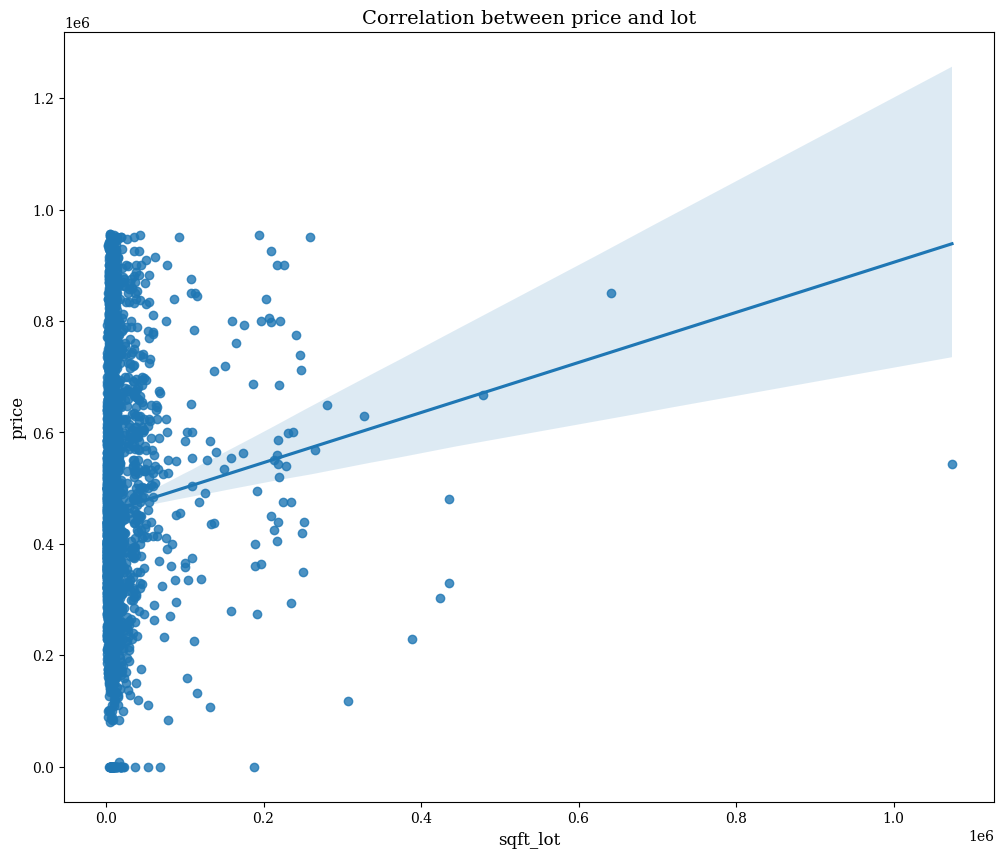

In [39]:
plt.figure(figsize=(12, 10))
lot_regplot = sns.regplot(clean_home_data['sqft_lot'], clean_home_data['price'])
plt.title("Correlation between price and lot")

In [84]:
lot_regplot.figure.savefig("correlation_between_price_and_lot.png")